In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import sys
sys.path.insert(0, "../"*2)
import warnings
warnings.filterwarnings('ignore')

In [53]:
from quantumnetworks import SingleModeSystem, plot_full_evolution
import numpy as np

# Trapezoidal Method

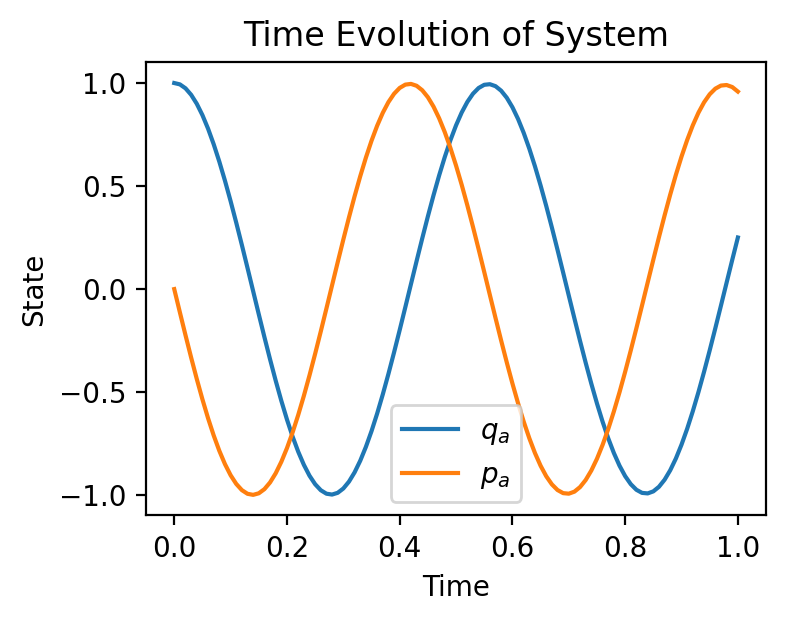

In [58]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 2*np.pi*1, "kappa_a": 2*np.pi*0.001, "kerr_a":2*np.pi*.4}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 1, 101)
X = sys.trapezoidal(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

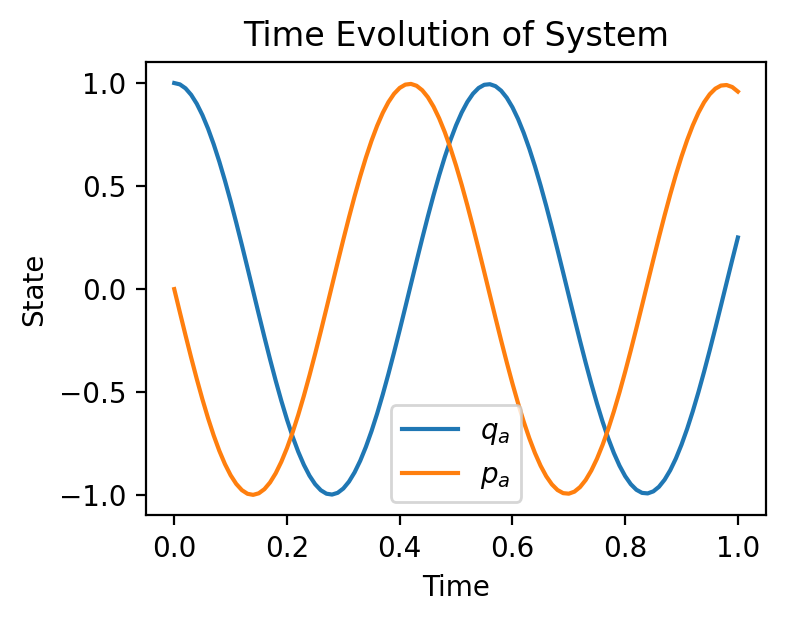

In [59]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 2*np.pi*1, "kappa_a": 2*np.pi*0.001, "kerr_a":2*np.pi*.4}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 1, 101)
X = sys.trapezoidal(x_0, ts, use_gcr=True)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

# Forward Euler

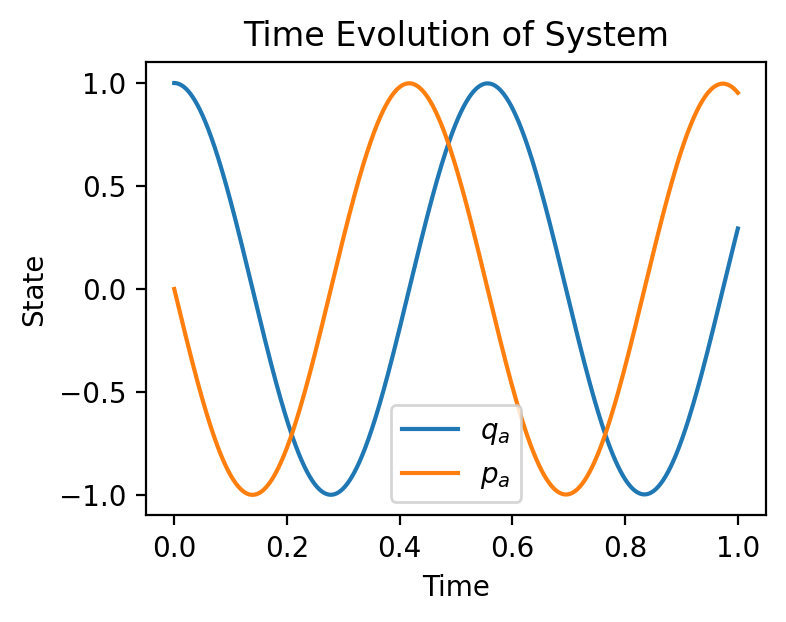

In [5]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 2*np.pi*1, "kappa_a": 2*np.pi*0.001, "kerr_a":2*np.pi*.4}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 1, 10001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

In [6]:
u = sys.eval_u(0)
np.allclose(sys.eval_Jf(x_0, u) , sys.eval_Jf_numerical(x_0, u), atol=1e-5)

True

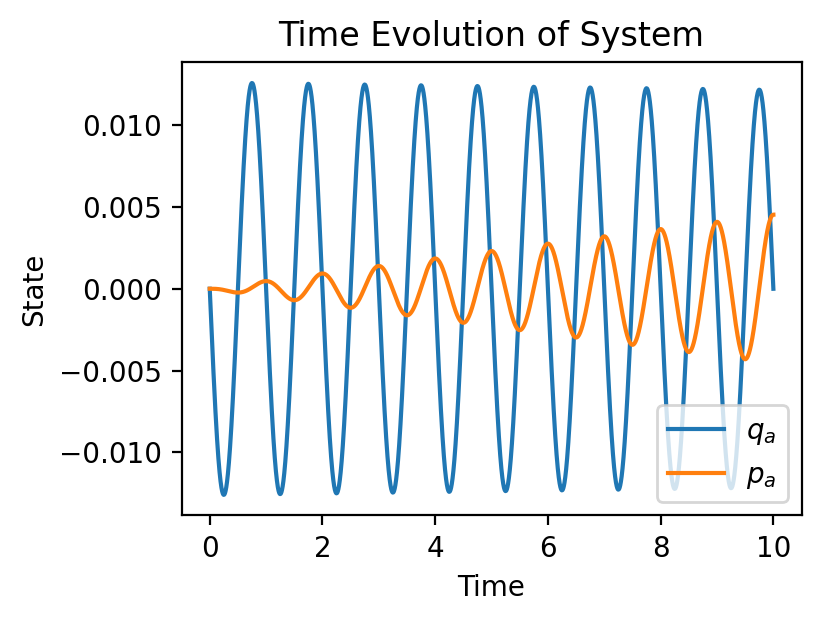

In [7]:
omega_a = 2*np.pi*1
A_in = lambda t: np.exp(1.0j*(omega_a*t))
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 2*np.pi*0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 10, 100001)
X = sys.forward_euler(x_0, ts)
X[1,:] = 10*X[1,:] 
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

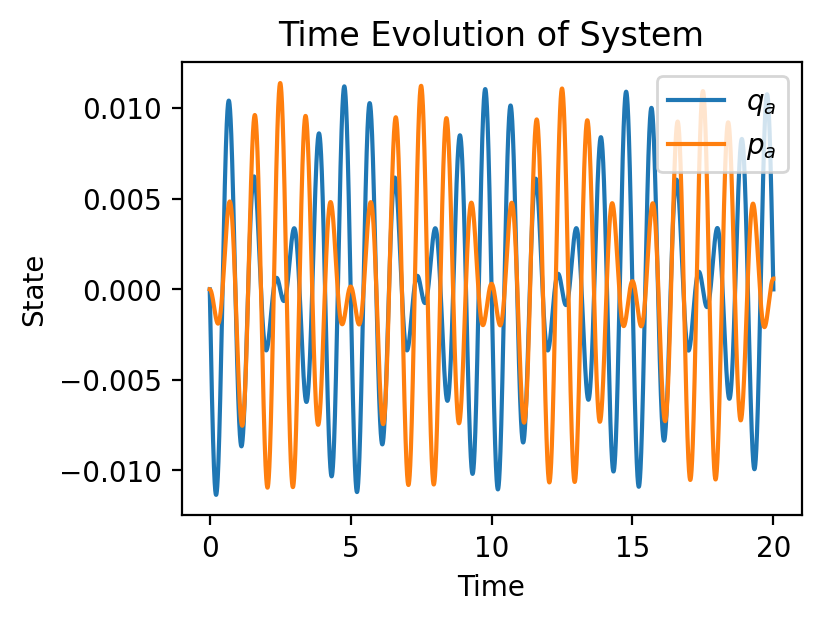

In [8]:
# detuned drive ramp up
omega_a = 2*np.pi*1
delta = 2*np.pi*0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t)
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 2*np.pi*0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 100001)
X = sys.forward_euler(x_0, ts)
X[1,:] = X[1,:] 
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

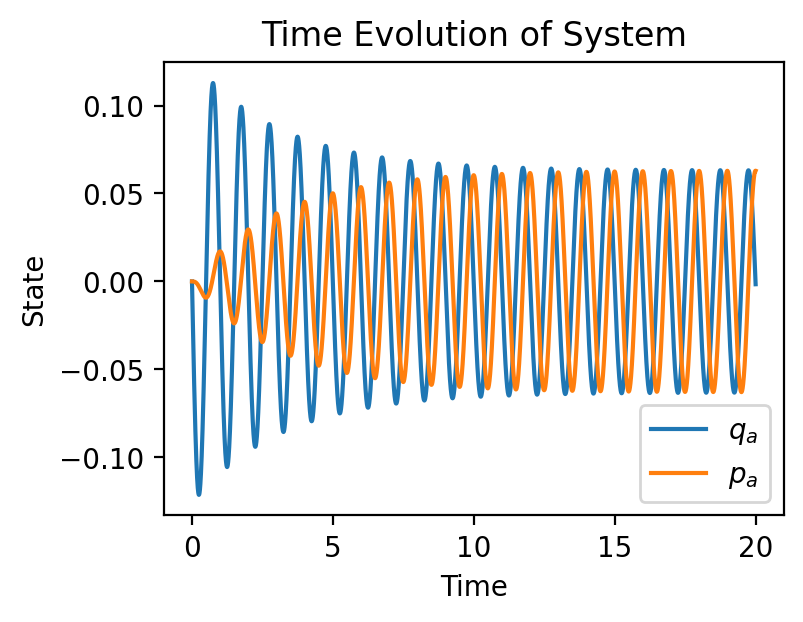

In [9]:
# ramp up on resonance
omega_a = 2*np.pi*1
delta = 2*np.pi*0.0
A_in = lambda t: np.exp(1j*(omega_a +delta)*t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 2*np.pi*0.1}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 100001)
X = sys.forward_euler(x_0, ts)
X[1,:] = X[1,:] 
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

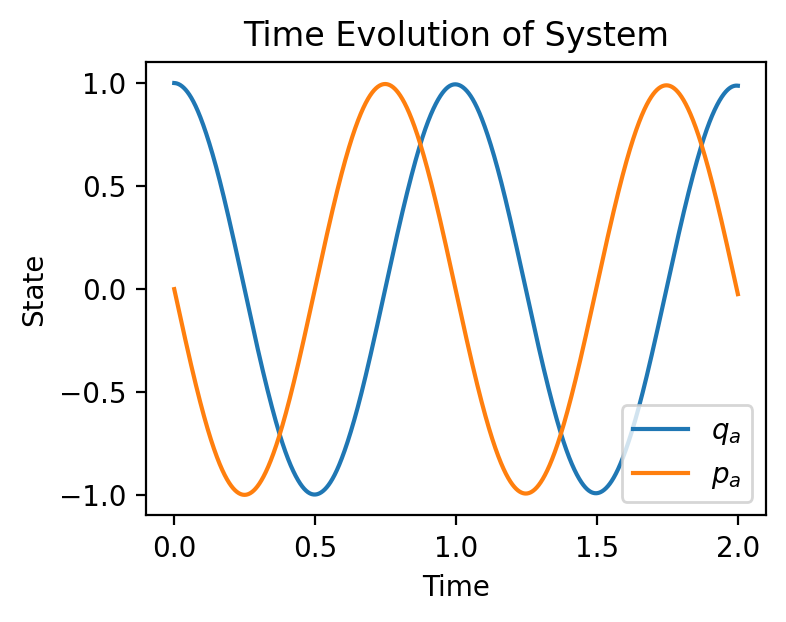

In [10]:
# RWA
omega_a = 2*np.pi*1
delta = 2*np.pi*10
A_in = lambda t: np.cos((omega_a +delta)*t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 2, 100001)
X = sys.forward_euler(x_0, ts)
X[1,:] = X[1,:] 
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

# Linearization

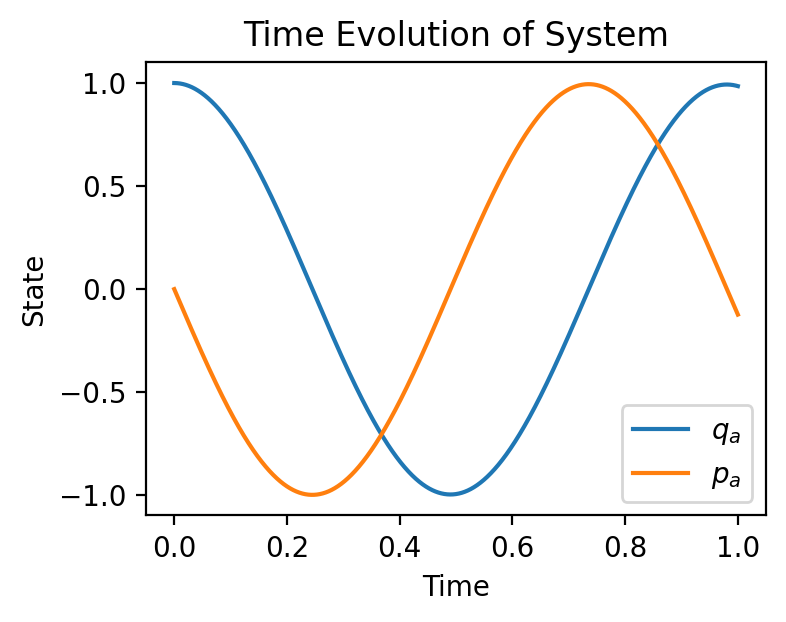

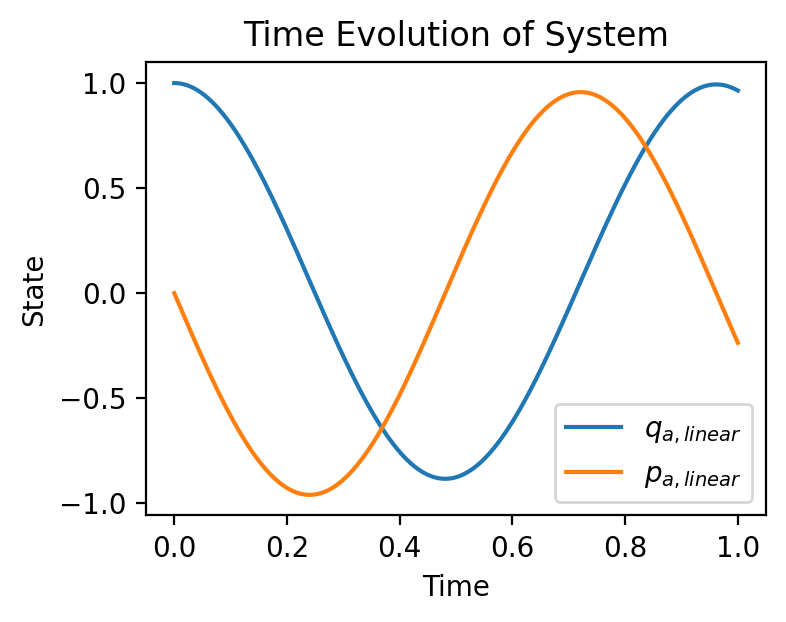

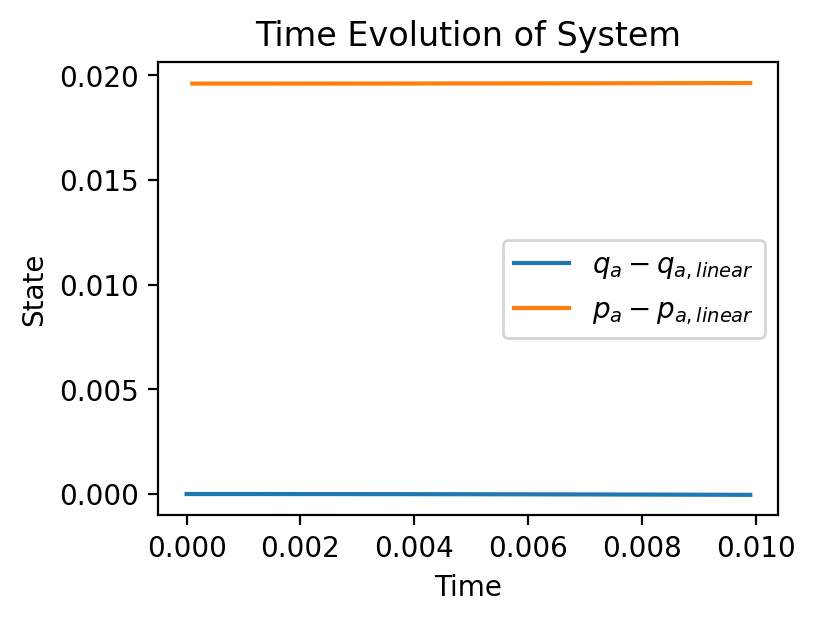

In [11]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 2*np.pi*1, "kappa_a": 2*np.pi*0.001, "kerr_a": 2*np.pi*0.01}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 1, 10001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

X_linear = sys.forward_euler_linear(x_0, ts, x_0, 0)
fig, ax = plot_full_evolution(X_linear, ts, labels=["$q_{a,linear}$","$p_{a,linear}$"])

Delta_X = (X-X_linear)/X
plot_full_evolution(Delta_X[:,:100], ts[:100], labels=["$q_a - q_{a,linear}$","$p_a - p_{a,linear}$"])
ax.legend()